## Import the libraries:

In [178]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
from operator import attrgetter
import matplotlib.colors as mcolors

## Load the data:

In [179]:
df_bids = pd.read_csv('bidsssss.csv')
df_train = pd.read_csv('train.csv')
#df_data = pd.read_csv('retail_data.csv',encoding='unicode_escape')

In [180]:
df_bids.shape

(7656334, 9)

## Data exploration:

In [181]:
print("Data shape: ", df_bids.shape)
print("Columns: ", df_bids.columns)

df_bids.head(10)

Data shape:  (7656334, 9)
Columns:  Index(['bid_id', 'bidder_id', 'auction', 'merchandise', 'device', 'time',
       'country', 'ip', 'url'],
      dtype='object')


,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3
5,5,e8291466de91b0eb4e1515143c7f74dexy2yr,3vi4t,mobile,phone7,9759243157894736,ru,91.107.221.27,vasstdc27m7nks3
6,6,eef4c687daf977f64fc1d08675c44444raj3s,kjlzx,mobile,phone2,9759243210526315,th,152.235.155.159,j9nl1xmo6fqhcc6
7,7,ab056855c9ca9d36390feae1fa485883issyg,f5f6k,home goods,phone8,9759243210526315,id,3.210.112.183,hnt6hu93a3z1cpc
8,8,d600dc03b11e7d782e1e4dae091b084a1h5ch,h7jjx,home goods,phone9,9759243210526315,th,103.64.157.225,vasstdc27m7nks3
9,9,a58ace8b671a7531c88814bc86b2a34cf0crb,3zpkj,sporting goods,phone4,9759243210526315,za,123.28.123.226,vasstdc27m7nks3


In [182]:
df_bids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   bid_id       int64 
 1   bidder_id    object
 2   auction      object
 3   merchandise  object
 4   device       object
 5   time         int64 
 6   country      object
 7   ip           object
 8   url          object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB


## Data review and cleaning:

#### Check for missing values

In [183]:
df_bids.isnull().sum()

bid_id            0
bidder_id         0
auction           0
merchandise       0
device            0
time              0
country        8859
ip                0
url               0
dtype: int64

In [184]:
## Drop null values as they are few .. This will not affect outputs alot
df_bids = df_bids.dropna(how='any',axis=0)
df_bids.isnull().sum()


bid_id         0
bidder_id      0
auction        0
merchandise    0
device         0
time           0
country        0
ip             0
url            0
dtype: int64

#### Check data description

In [185]:
df_bids.describe()

,bid_id,time
count,7.647475e+06,7.647475e+06
mean,3.828065e+06,9.697973e+15
std,2.210112e+06,5.250720e+13
min,0.000000e+00,9.631917e+15
25%,1.914266e+06,9.641138e+15
50%,3.828010e+06,9.700652e+15
75%,5.741946e+06,9.761744e+15
max,7.656333e+06,9.772885e+15


C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time'>

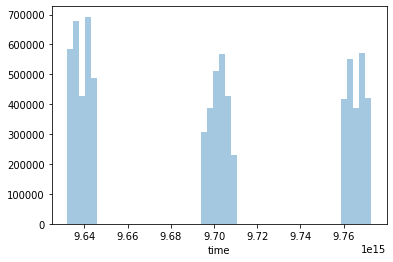

In [186]:
sns.distplot(df_bids.time, kde=False)

In [187]:
country_cout = df_bids['country'].value_counts()
print("Country Count: ", country_cout.shape[0] )
country_cout

Country Count:  199


in    1788731
ng     586586
id     453611
tr     319574
us     318103
       ...   
an          2
er          2
gp          2
mh          1
tc          1
Name: country, Length: 199, dtype: int64

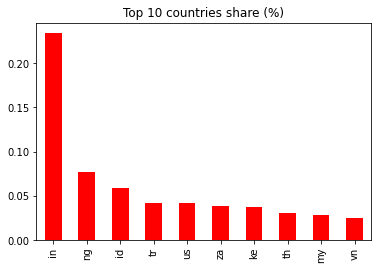

in    0.233898
ng    0.076703
id    0.059315
tr    0.041788
us    0.041596
za    0.038960
ke    0.037655
th    0.031144
my    0.028349
vn    0.024890
Name: country, dtype: float64

In [188]:
df_bids['country'].value_counts(normalize=True)[0:10].plot.bar(title= 'Top 10 countries share (%)', color = 'red')
plt.show()
df_bids['country'].value_counts(normalize=True)[0:10]

In [189]:
print(pd.unique(df_bids['bidder_id']).shape[0],"Unique bidder_ids")

6609 Unique bidder_ids


In [190]:
print(pd.unique(df_bids['ip']).shape[0],"Unique ips")

2297413 Unique ips


In [191]:
print(pd.unique(df_bids['device']).shape[0],"Unique devices")

7350 Unique devices


## Feature Engineering

#### Counts frequency of current details per bidder_id 

In [192]:
df_bids_unique = df_bids.groupby("bidder_id").nunique().reset_index()
df_bids_unique.head()

,bidder_id,bid_id,auction,merchandise,device,time,country,ip,url
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1
1,002d229ffb247009810828f648afc2ef593rb,2,1,1,2,2,1,1,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,3,1,3,3,1,3,2
4,00486a11dff552c4bd7696265724ff81yeo9v,20,13,1,8,20,1,10,7


In most cases 'bid_id' and 'time' will have similar values, except in rare cases if 2 bids are done at the exact same time, which is impossible if not a bot.

Next, We merge the previous counts with the train data, using 'bidder_id' as the linking column.

In [193]:
## Add(merge) counts to the train data frame .. Missing user IDs will automitically be dropped 
df_train_f1 = pd.merge(df_bids_unique, df_train)
df_train_f1.head()

,bidder_id,bid_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1,a3d2de7675556553a5f08e4c88d2c228iiasc,a3d2de7675556553a5f08e4c88d2c2282aj35,0.0
1,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1,a3d2de7675556553a5f08e4c88d2c228jem8t,f3bc67b04b43c3cebd1db5ed4941874c9br67,0.0
2,00a0517965f18610417ee784a05f494d4dw6e,141,74,1,67,141,16,103,84,52743ba515e9c1279ac76e19f00c0b001p3pm,7578f951008bd0b64528bf81b8578d5djy0uy,0.0
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,3,3,1,3,3,2,3,1,cdd7b79f306a2b331ab5fb6f19d6edebllbjt,b3d2348e65b940c31bfceeee5a1f9dabels6u,0.0
4,01067975436d123f717ee5aba0dd4bbfa0937,534,17,1,164,534,71,389,4,a3d2de7675556553a5f08e4c88d2c228d0upt,ca7ebbf817ced6e7194200eb690eda41u4mda,0.0


In [194]:
print('Number of bidder ids before merging:',df_train.shape[0])
print('Number of bidder ids after merging:',df_train_f1.shape[0])
print('Difference:',df_train.shape[0]-df_train_f1.shape[0])

Number of bidder ids before merging: 2013
Number of bidder ids after merging: 1983
Difference: 30


There are 30 bidder ids got dropped cuz they didn't appear in one of the data frames.

We need to rename the new columns for relevant names.

I believe that 'payment_account' and 'address' are of no use; therefore, I'll drop them. I Keep 'bidder_id' for further merging.

In [195]:
## Rename the new count columns
df_train_f1 = df_train_f1.rename(columns = {'bid_id': 'bids_count', 'auction': 'auct_count', 'merchandise': 'merch_type_count', 
                                        'device': 'device_type_count', 'time': 'time_count', 'country': 'country_count', 
                                        'ip': 'ip_count', 'url': 'url_count'})

# Drop 'payment_account' and 'address' columns. Keep 'bidder_id' for further merging
df_train_f1 = df_train_f1.drop(columns = ['payment_account', 'address'])
df_train_f1.head()

,bidder_id,bids_count,auct_count,merch_type_count,device_type_count,time_count,country_count,ip_count,url_count,outcome
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1,0.0
1,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1,0.0
2,00a0517965f18610417ee784a05f494d4dw6e,141,74,1,67,141,16,103,84,0.0
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,3,3,1,3,3,2,3,1,0.0
4,01067975436d123f717ee5aba0dd4bbfa0937,534,17,1,164,534,71,389,4,0.0


### Time-related features

In [196]:
df_bids_time = df_bids.sort_values(['bidder_id', 'time'])
df_bids_time.head(10)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
7179832,7179832,001068c415025a009fee375a12cff4fcnht8y,4ifac,jewelry,phone561,9706345052631578,bn,139.226.147.115,vasstdc27m7nks3
1281292,1281292,002d229ffb247009810828f648afc2ef593rb,2tdw2,mobile,phone640,9766744105263157,sg,37.40.254.131,vasstdc27m7nks3
1281311,1281311,002d229ffb247009810828f648afc2ef593rb,2tdw2,mobile,phone219,9766744210526315,sg,37.40.254.131,vasstdc27m7nks3
6805028,6805028,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,mobile,phone313,9704553947368421,ir,21.67.17.162,vnw40k8zzokijsv
3967330,3967330,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,obbny,mobile,phone420,9640018631578947,id,44.241.8.179,sj4jidex850loas
6166636,6166636,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,mobile,phone102,9700605052631578,id,190.88.89.83,sj4jidex850loas
7140567,7140567,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,efh5o,mobile,phone257,9705974315789473,id,115.47.140.180,vasstdc27m7nks3
2597846,2597846,00486a11dff552c4bd7696265724ff81yeo9v,no958,home goods,phone4,9632636526315789,ng,143.118.40.162,vasstdc27m7nks3
2599005,2599005,00486a11dff552c4bd7696265724ff81yeo9v,6plix,home goods,phone4,9632641157894736,ng,143.118.40.162,vasstdc27m7nks3
2750709,2750709,00486a11dff552c4bd7696265724ff81yeo9v,gst86,home goods,phone45,9633339684210526,ng,54.212.177.220,0wfuwlacucr1cdl


#### Time difference between two

We can calcluate this difference for bidders with more than one bid. However, bidders with only one bid will have missing values.

In [197]:
bids_time_diff = df_bids_time.groupby('bidder_id')[['time']].diff()
bids_time_diff.head(7)

,time
7179832,NaN
1281292,NaN
1281311,1.052632e+08
6805028,NaN
3967330,NaN
6166636,6.058642e+13
7140567,5.369263e+12


'NaN' occurs when a bidder have only one bid or in the first occurance of a bid.

In [198]:
type(bids_time_diff)

pandas.core.frame.DataFrame

In [199]:
df_bids_time['time_diff'] = bids_time_diff

# Create another data frame but with 'NaN' values dropped
df_bids_time_clean = df_bids_time.dropna(how='any',axis=0)

####  Aggregate functions of time difference

Time differences between bids is important, that's why we need to get more features related to it. This can be done by finding the aggregate functions (i.e., min, max, median, mean, etc )

In [200]:
df_bids_time_clean_agg_fun = df_bids_time_clean.groupby('bidder_id')[['time_diff']].describe().reset_index()
df_bids_time_clean_agg_fun.head(10)

bidder_id time_diff                \
                                             count          mean   
0  002d229ffb247009810828f648afc2ef593rb       1.0  1.052632e+08   
1  003180b29c6a5f8f1d84a6b7b6f7be57tjj1o       2.0  3.297784e+13   
2  00486a11dff552c4bd7696265724ff81yeo9v      19.0  4.018413e+12   
3  0051aef3fdeacdadba664b9b3b07e04e4coc6      67.0  1.635106e+11   
4  0053b78cde37c4384a20d2da9aa4272aym4pb   10936.0  7.066608e+09   
5  0061edfc5b07ff3d70d693883a38d370oy4fs     133.0  1.022327e+11   
6  00862324eb508ca5202b6d4e5f1a80fc3t3lp       4.0  7.631579e+08   
7  009cee781e8414f7fb55b2f92157e9dbu0y6o       4.0  1.607411e+13   
8  00a0517965f18610417ee784a05f494d4dw6e     140.0  5.486831e+11   
9  00a79ebd15f0b24a0a3b5794457cd8ed7dng1     397.0  7.611958e+09   

                                                                         \
            std           min           25%           50%           75%   
0           NaN  1.052632e+08  1.052632e+08  1.052632e+08  1.052632e+08   
1  3.904443e+13  5.369263e+12  1.917355e+13  3.297784e+13  4.678213e+13   
2  1.153730e+13  3.684211e+08  1.101316e+11  9.177368e+11  1.806895e+12   
3  5.770740e+11  5.263158e+07  4.736842e+08  2.736842e+09  1.276316e+10   
4  4.784831e+11  0.000000e+00  1.578947e+08  3.684211e+08  1.157895e+09   
5  1.627482e+11  1.578947e+08  4.947368e+09  4.984211e+10  1.285263e+11   
6  3.113726e+08  5.263158e+08  5.657895e+08  6.578947e+08  8.552632e+08   
7  2.464259e+13  1.771789e+12  3.961276e+12  4.773895e+12  1.688672e+13   
8  4.250424e+12  5.263158e+08  1.107895e+10  5.615789e+10  2.002895e+11   
9  1.014836e+10  0.000000e+00  1.578947e+08  3.894737e+09  9.421053e+09   

                 
            max  
0  1.052632e+08  
1  6.058642e+13  
2  5.094174e+13  
3  3.792368e+12  
4  5.002753e+13  
5  1.112000e+12  
6  1.210526e+09  
7  5.297684e+13  
8  5.012521e+13  
9  4.726316e+10

Some bidders achieved 'min' time difference between bids of 0. This is an act of a bot most probably. 

We cant calculate std for 1 value; therefore, its value is 'NA'. We will fill it with 0.

We need to calculate IQR, drop unwanted columns, and rename the rest.

In [201]:
# Drop first row ('time_interval' and 'bidder_id') to be able to reach the other columns easier
df_bids_time_clean_agg_fun = df_bids_time_clean_agg_fun.droplevel(axis=1,level=0)

# Calclulate IQR
df_bids_time_clean_agg_fun['tdiff_iqr'] = df_bids_time_clean_agg_fun['75%'] - df_bids_time_clean_agg_fun['25%']

# Drop 'count', '25%', and '75%', and rename columns to relevant names. Fill NA of std with 0s
df_bids_time_clean_agg_fun = df_bids_time_clean_agg_fun.drop(columns=['25%', '75%', 'count'])
df_bids_time_clean_agg_fun = df_bids_time_clean_agg_fun.rename(columns = {'': 'bidder_id', 'mean': 'tdiff_mean', 'std': 'tdiff_std', '50%': 'tdiff_median',
                                                'min': 'tdiff_min', 'max': 'tdiff_max'}).fillna(0)
df_bids_time_clean_agg_fun.head()

,bidder_id,tdiff_mean,tdiff_std,tdiff_min,tdiff_median,tdiff_max,tdiff_iqr
0,002d229ffb247009810828f648afc2ef593rb,1.052632e+08,0.000000e+00,1.052632e+08,1.052632e+08,1.052632e+08,0.000000e+00
1,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3.297784e+13,3.904443e+13,5.369263e+12,3.297784e+13,6.058642e+13,2.760858e+13
2,00486a11dff552c4bd7696265724ff81yeo9v,4.018413e+12,1.153730e+13,3.684211e+08,9.177368e+11,5.094174e+13,1.696763e+12
3,0051aef3fdeacdadba664b9b3b07e04e4coc6,1.635106e+11,5.770740e+11,5.263158e+07,2.736842e+09,3.792368e+12,1.228947e+10
4,0053b78cde37c4384a20d2da9aa4272aym4pb,7.066608e+09,4.784831e+11,0.000000e+00,3.684211e+08,5.002753e+13,1.000000e+09


In [202]:
## Add the new features to the train data set
df_train_f2 = pd.merge(df_train_f1, df_bids_time_clean_agg_fun, how = 'left')

## Fill 'NaN' values with the meadian of the other values
df_train_f2 = df_train_f2.fillna(df_train_f2.median())
df_train_f2.head()

C:\Users\urvas\AppData\Local\Temp/ipykernel_6180/3119970558.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train_f2 = df_train_f2.fillna(df_train_f2.median())


,bidder_id,bids_count,auct_count,merch_type_count,device_type_count,time_count,country_count,ip_count,url_count,outcome,tdiff_mean,tdiff_std,tdiff_min,tdiff_median,tdiff_max,tdiff_iqr
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1,0.0,5.810724e+11,1.093135e+12,5.789474e+08,1.242632e+11,5.147789e+12,1.801579e+11
1,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1,0.0,5.810724e+11,1.093135e+12,5.789474e+08,1.242632e+11,5.147789e+12,1.801579e+11
2,00a0517965f18610417ee784a05f494d4dw6e,141,74,1,67,141,16,103,84,0.0,5.486831e+11,4.250424e+12,5.263158e+08,5.615789e+10,5.012521e+13,1.892105e+11
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,3,3,1,3,3,2,3,1,0.0,2.748400e+13,3.879180e+13,5.405263e+10,2.748400e+13,5.491395e+13,2.742995e+13
4,01067975436d123f717ee5aba0dd4bbfa0937,534,17,1,164,534,71,389,4,0.0,2.549620e+10,5.382174e+10,5.263158e+07,1.410526e+10,9.704211e+11,2.478947e+10


In [203]:
df_train_f2.isnull().sum()

bidder_id            0
bids_count           0
auct_count           0
merch_type_count     0
device_type_count    0
time_count           0
country_count        0
ip_count             0
url_count            0
outcome              0
tdiff_mean           0
tdiff_std            0
tdiff_min            0
tdiff_median         0
tdiff_max            0
tdiff_iqr            0
dtype: int64

There are 'NA' values

#### Zero-time difference bids count

Bidders that could achieve 0s-difference bids are most probably bots. Therefore, we will need to add the count of 0-time difference bits into consideration.

In [204]:
zero_diff_bids = df_bids_time_clean[df_bids_time_clean['time_diff'] == 0].groupby('bidder_id').count().reset_index()
zero_diff_bids = zero_diff_bids.rename(columns = {'time_diff': 'zero_diff_bids_count'})
zero_diff_bids = zero_diff_bids[['bidder_id','zero_diff_bids_count']]

In [205]:
zero_diff_bids[:10]

,bidder_id,zero_diff_bids_count
0,0053b78cde37c4384a20d2da9aa4272aym4pb,727
1,00a79ebd15f0b24a0a3b5794457cd8ed7dng1,29
2,00b519ec8ed5e370328451379bb708a306eoj,1
3,00e0f614d9dd32dd27f6080f472d2934emlos,15
4,019cf2d366df756c092c91e26f406acdozha7,1
5,0204227c6c8042ec8d8cc1bacb0d44b1csycb,2
6,022ac3a7ce986049d9a4bede83ccf9ddctvg6,325
7,024d6a4a489d4411f795d04b6617d1f47qvrs,157
8,02db55f07b252ecff0aa4cba93880a44bv4eb,2
9,02fbc26f080655008337619a08cb7c04voa3c,95


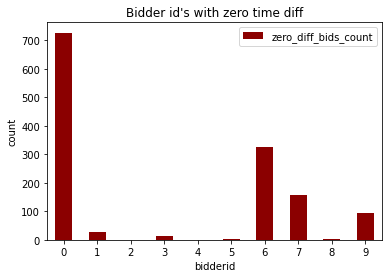

In [206]:
zero_diff_bids[:10].plot(kind='bar', rot=0,xlabel= 'bidderid', ylabel='count',title = "Bidder id's with zero time diff", color="darkred");

In [207]:
df_train_f3 = pd.merge(df_train_f2, zero_diff_bids, how = 'left').fillna(0)
df_train_f3.head()

,bidder_id,bids_count,auct_count,merch_type_count,device_type_count,time_count,country_count,ip_count,url_count,outcome,tdiff_mean,tdiff_std,tdiff_min,tdiff_median,tdiff_max,tdiff_iqr,zero_diff_bids_count
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1,0.0,5.810724e+11,1.093135e+12,5.789474e+08,1.242632e+11,5.147789e+12,1.801579e+11,0.0
1,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1,0.0,5.810724e+11,1.093135e+12,5.789474e+08,1.242632e+11,5.147789e+12,1.801579e+11,0.0
2,00a0517965f18610417ee784a05f494d4dw6e,141,74,1,67,141,16,103,84,0.0,5.486831e+11,4.250424e+12,5.263158e+08,5.615789e+10,5.012521e+13,1.892105e+11,0.0
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,3,3,1,3,3,2,3,1,0.0,2.748400e+13,3.879180e+13,5.405263e+10,2.748400e+13,5.491395e+13,2.742995e+13,0.0
4,01067975436d123f717ee5aba0dd4bbfa0937,534,17,1,164,534,71,389,4,0.0,2.549620e+10,5.382174e+10,5.263158e+07,1.410526e+10,9.704211e+11,2.478947e+10,0.0


### First and last bid count per bidder

A bidding bot type called (sniper bot) work on the idea of being last person to bid so that no one can bid after you (no time at the end of an auction for anoter one to bid). Therefore, this type of information is important. We need to know how many times a bidder placed a bid last time (won auction) and how many times placed the first (bot waiting for the auction to start).

#### First bid count

In [208]:
## Sort values per auction per time
df_bids_sorted_auction_time = df_bids.sort_values(['auction', 'time'])

## Get the first bidder of each auction
df_bids_first_bid = df_bids_sorted_auction_time.groupby('auction').first().reset_index()

## Count how many times a bidder placed the first bid
df_bids_first_bid_count = df_bids_first_bid.groupby('bidder_id').count()['bid_id'].reset_index().rename(columns = {'bid_id': 'first_bid_count'})

df_bids_first_bid_count["first_bid_count"].sort_values(ascending = False)

df_bids_first_bid_count.head()

,bidder_id,first_bid_count
0,0053b78cde37c4384a20d2da9aa4272aym4pb,4
1,00a79ebd15f0b24a0a3b5794457cd8ed7dng1,7
2,00e0f614d9dd32dd27f6080f472d2934emlos,6
3,019cf2d366df756c092c91e26f406acdozha7,2
4,01cda526658455000913950f20cf31a2q6nsf,8


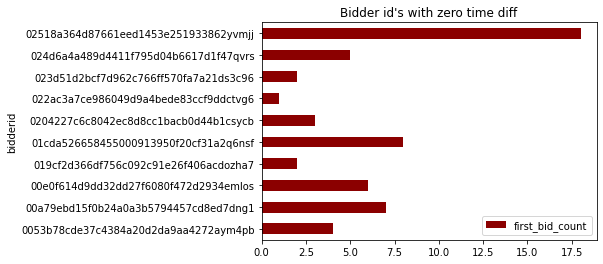

In [209]:
df_bids_first_bid_count[:10].plot(x='bidder_id', y='first_bid_count', kind='barh',xlabel= 'bidderid', ylabel='First Bid Count',title = "Bidder id's with zero time diff", color="darkred");

#### Last bid count (won auction)

In [210]:
## Get the last bidder of each auction
df_bids_last_bid = df_bids_sorted_auction_time.groupby('auction').last().reset_index()

## Count how many times a bidder placed the last bid (won)
df_bids_last_bid_count = df_bids_last_bid.groupby('bidder_id').count()['bid_id'].reset_index().rename(columns = {'bid_id': 'last_bid_count'})

df_bids_last_bid_count["last_bid_count"].sort_values(ascending = False)

df_bids_last_bid_count.head()

,bidder_id,last_bid_count
0,0053b78cde37c4384a20d2da9aa4272aym4pb,6
1,00b519ec8ed5e370328451379bb708a306eoj,1
2,00e0f614d9dd32dd27f6080f472d2934emlos,3
3,01067975436d123f717ee5aba0dd4bbfa0937,1
4,0113d101ec6aabd354adac645a1ec3e82ln88,1


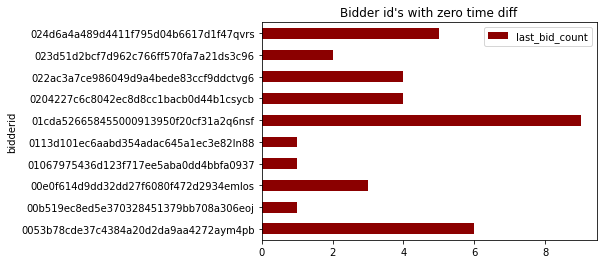

In [211]:
df_bids_last_bid_count[:10].plot(x='bidder_id', y='last_bid_count', kind='barh',xlabel= 'bidderid', ylabel='Last Bid Count',title = "Bidder id's with zero time diff", color="darkred");

#### Merge first and last bid count to the training set

In [212]:
df_train_f4 = pd.merge(df_train_f3, df_bids_first_bid_count, how = 'left').fillna(0)
df_train_f5 = pd.merge(df_train_f4, df_bids_last_bid_count, how = 'left').fillna(0)

df_train_f5.head()

,bidder_id,bids_count,auct_count,merch_type_count,device_type_count,time_count,country_count,ip_count,url_count,outcome,tdiff_mean,tdiff_std,tdiff_min,tdiff_median,tdiff_max,tdiff_iqr,zero_diff_bids_count,first_bid_count,last_bid_count
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1,0.0,5.810724e+11,1.093135e+12,5.789474e+08,1.242632e+11,5.147789e+12,1.801579e+11,0.0,0.0,0.0
1,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1,0.0,5.810724e+11,1.093135e+12,5.789474e+08,1.242632e+11,5.147789e+12,1.801579e+11,0.0,0.0,0.0
2,00a0517965f18610417ee784a05f494d4dw6e,141,74,1,67,141,16,103,84,0.0,5.486831e+11,4.250424e+12,5.263158e+08,5.615789e+10,5.012521e+13,1.892105e+11,0.0,0.0,0.0
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,3,3,1,3,3,2,3,1,0.0,2.748400e+13,3.879180e+13,5.405263e+10,2.748400e+13,5.491395e+13,2.742995e+13,0.0,0.0,0.0
4,01067975436d123f717ee5aba0dd4bbfa0937,534,17,1,164,534,71,389,4,0.0,2.549620e+10,5.382174e+10,5.263158e+07,1.410526e+10,9.704211e+11,2.478947e+10,0.0,0.0,1.0


## Theoritical Features

#### Max number of bids ever placed in auction

The main goal of bots is to win auctions; therefore, we believe they will tend to bid more then human bids to ensure winning

In [213]:
# Get the count of bids in every auction grouped by 'bidder_id' and 'auction'
df_max_bids_count_auction = df_bids.groupby(['bidder_id', 'auction']).count().reset_index()

# Kepp important columns
df_max_bids_count_auction = df_max_bids_count_auction[['bidder_id', 'bid_id']].rename(columns = {'bid_id': 'bids_in_auct_count'})

# Get max count per bidder id
df_max_bids_count_auction = df_max_bids_count_auction.groupby('bidder_id').max().reset_index()

# Keep only highest value of bids count for each bedder id
df_max_bids_count_auction = df_max_bids_count_auction[['bidder_id', 'bids_in_auct_count']].rename(columns = {'bids_in_auct_count': 'max_bids_in_auct_count'})

df_max_bids_count_auction.head()

,bidder_id,max_bids_in_auct_count
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,2
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1
4,00486a11dff552c4bd7696265724ff81yeo9v,3


In [214]:
df_train_f6 = pd.merge(df_train_f5, df_max_bids_count_auction, how = 'left').fillna(0)

df_train_f6.head()

,bidder_id,bids_count,auct_count,merch_type_count,device_type_count,time_count,country_count,ip_count,url_count,outcome,tdiff_mean,tdiff_std,tdiff_min,tdiff_median,tdiff_max,tdiff_iqr,zero_diff_bids_count,first_bid_count,last_bid_count,max_bids_in_auct_count
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1,0.0,5.810724e+11,1.093135e+12,5.789474e+08,1.242632e+11,5.147789e+12,1.801579e+11,0.0,0.0,0.0,1
1,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1,0.0,5.810724e+11,1.093135e+12,5.789474e+08,1.242632e+11,5.147789e+12,1.801579e+11,0.0,0.0,0.0,1
2,00a0517965f18610417ee784a05f494d4dw6e,141,74,1,67,141,16,103,84,0.0,5.486831e+11,4.250424e+12,5.263158e+08,5.615789e+10,5.012521e+13,1.892105e+11,0.0,0.0,0.0,7
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,3,3,1,3,3,2,3,1,0.0,2.748400e+13,3.879180e+13,5.405263e+10,2.748400e+13,5.491395e+13,2.742995e+13,0.0,0.0,0.0,1
4,01067975436d123f717ee5aba0dd4bbfa0937,534,17,1,164,534,71,389,4,0.0,2.549620e+10,5.382174e+10,5.263158e+07,1.410526e+10,9.704211e+11,2.478947e+10,0.0,0.0,1.0,511


#### View features distribution

In [215]:
all_features = df_train_f6.columns.drop(['bidder_id', 'outcome'])
all_features.shape

(18,)

C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


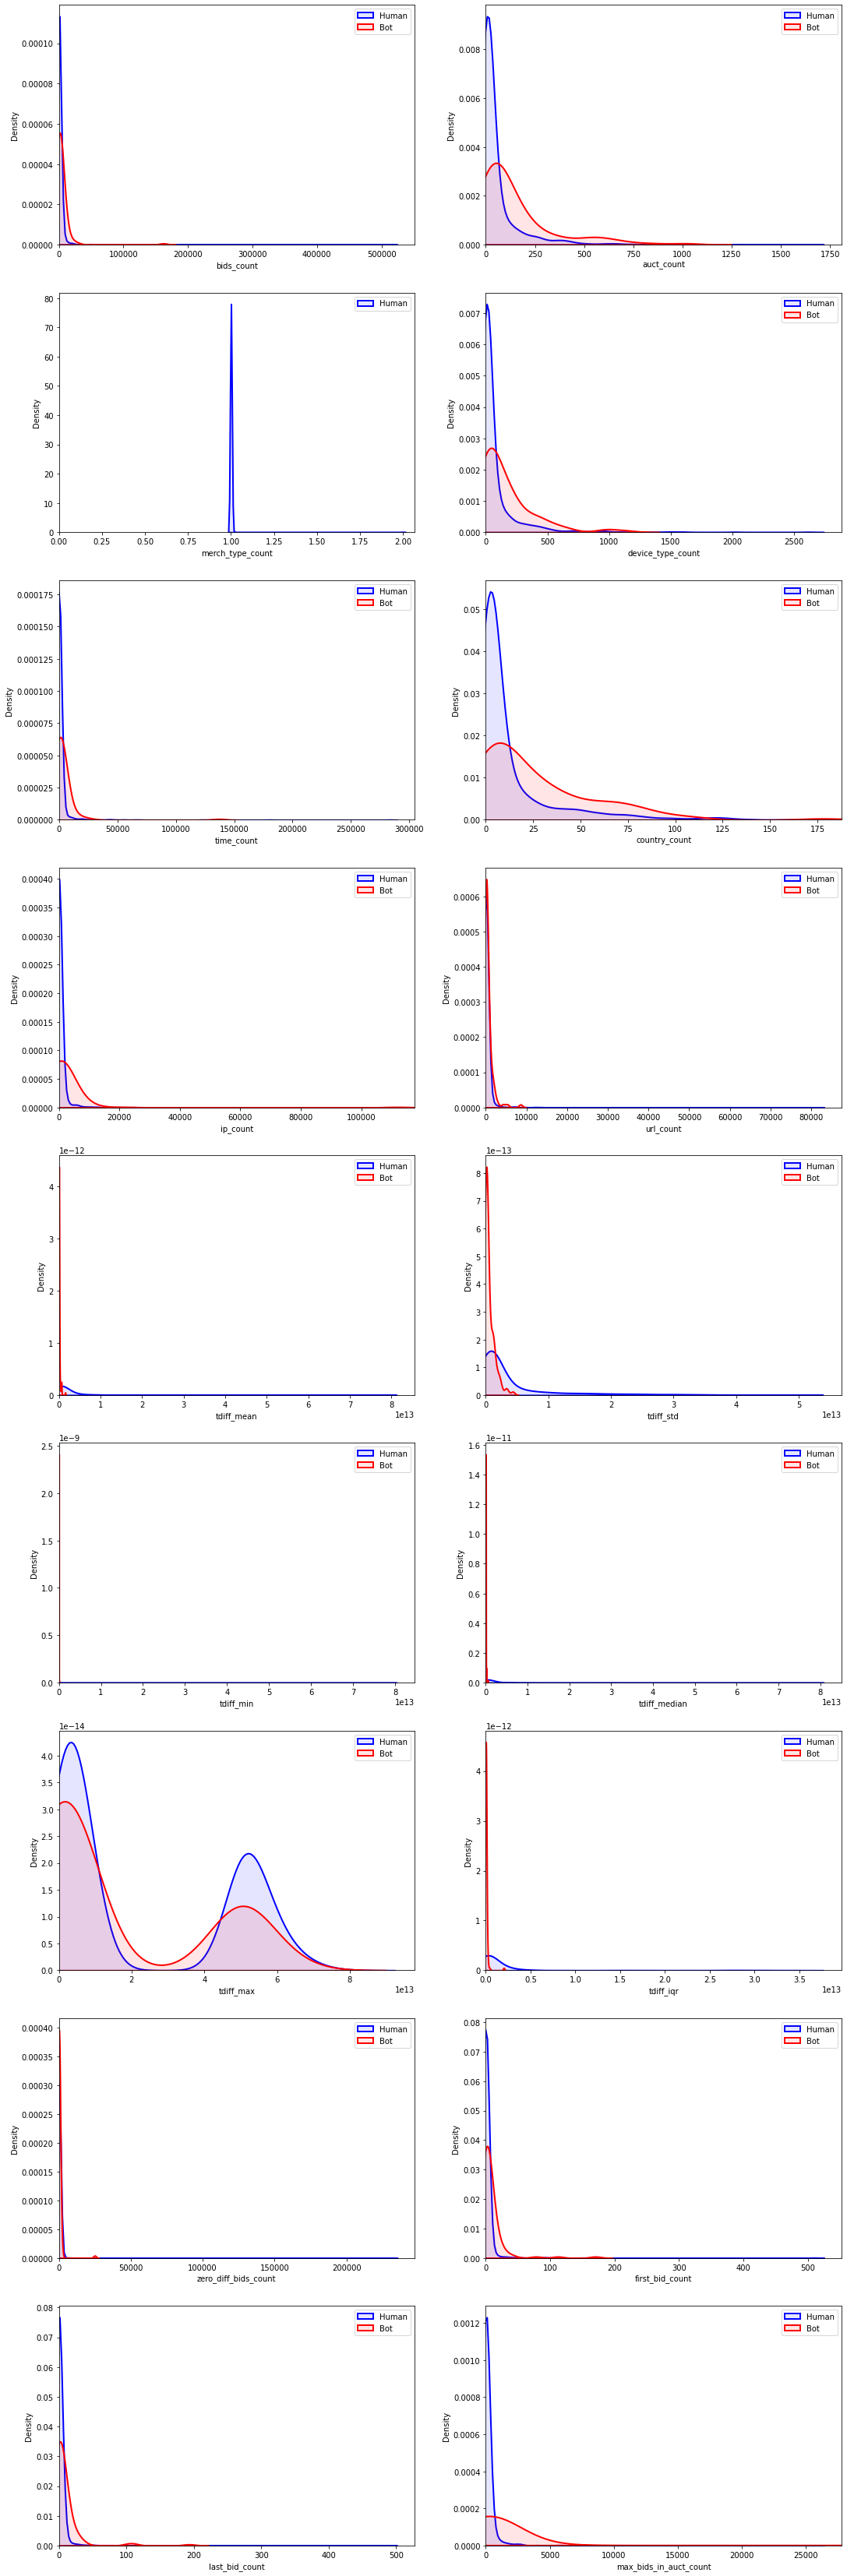

In [216]:
nrows = 9
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (18, 60))
for i, column in enumerate(all_features):
    humans = sns.kdeplot(data = df_train_f6[df_train_f6['outcome'] == 0],
                x = column,
                ax = axes[i // ncols, i % ncols],
                color = 'blue',
                fill = True,
                alpha = 0.1,
                linewidth = 2,
                label = 'Human').set_xlim(left = 0)
    bots = sns.kdeplot(data = df_train_f6[df_train_f6['outcome'] == 1],
                x = column,
                ax = axes[i // ncols, i % ncols],
                color = 'red',
                fill = True,
                alpha = 0.1,
                linewidth = 2,
                label = 'Bot').set_xlim(left = 0)
    axes[i // ncols,i % ncols].legend()
    
plt.show()

- Merch_type_count can be dropped as they add no value and might cause problems while training as the bot distribution is not available

- url_count have teh same distribution for both human and bots

In [217]:
df_train_f6.head()


,bidder_id,bids_count,auct_count,merch_type_count,device_type_count,time_count,country_count,ip_count,url_count,outcome,tdiff_mean,tdiff_std,tdiff_min,tdiff_median,tdiff_max,tdiff_iqr,zero_diff_bids_count,first_bid_count,last_bid_count,max_bids_in_auct_count
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1,0.0,5.810724e+11,1.093135e+12,5.789474e+08,1.242632e+11,5.147789e+12,1.801579e+11,0.0,0.0,0.0,1
1,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1,0.0,5.810724e+11,1.093135e+12,5.789474e+08,1.242632e+11,5.147789e+12,1.801579e+11,0.0,0.0,0.0,1
2,00a0517965f18610417ee784a05f494d4dw6e,141,74,1,67,141,16,103,84,0.0,5.486831e+11,4.250424e+12,5.263158e+08,5.615789e+10,5.012521e+13,1.892105e+11,0.0,0.0,0.0,7
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,3,3,1,3,3,2,3,1,0.0,2.748400e+13,3.879180e+13,5.405263e+10,2.748400e+13,5.491395e+13,2.742995e+13,0.0,0.0,0.0,1
4,01067975436d123f717ee5aba0dd4bbfa0937,534,17,1,164,534,71,389,4,0.0,2.549620e+10,5.382174e+10,5.263158e+07,1.410526e+10,9.704211e+11,2.478947e+10,0.0,0.0,1.0,511


## Model

In [218]:
#! pip install -U imbalanced-learn
#! pip install xgboost

In [219]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from time import time
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline

In [220]:
df_train_data = df_train_f6.copy()

x_df_train = df_train_data.drop(columns=['bidder_id', 'outcome','merch_type_count'])
y_df_train = df_train_data[['outcome']]

In [221]:
dist = df_train_data['outcome'].value_counts()
dist_norm = df_train_data['outcome'].value_counts(normalize=True)
print('Human count:', dist[0],'instances, which is', (round(dist_norm[0],4)*100),'% of the data' )
print('Bot count:', dist[1],'instances, which is', (round(dist_norm[1],4)*100),'% of the data' )

Human count: 1880 instances, which is 94.81 % of the data
Bot count: 103 instances, which is 5.19 % of the data


The distribution between bots and humans is not balanced. This will affect the training. Therefore, we need to do sampling to generate some instances.

This is a classification problem, so we need to consider classification models like random forest and logistic regression

In [222]:
## Oversample bot instances
ros = RandomOverSampler(sampling_strategy = 0.3, random_state=777)
#this means that the minority class will be oversampled to reach 30% of the majority class
X_resampled, y_resampled = ros.fit_resample(x_df_train, y_df_train)

In [223]:
dist = y_resampled['outcome'].value_counts()
dist_norm = y_resampled['outcome'].value_counts(normalize=True)
print('After Over-Sampling')
print('Human count:', dist[0],'instances, which is', (round(dist_norm[0],4)*100),'% of the data' )
print('Bot count:', dist[1],'instances, which is', (round(dist_norm[1],4)*100),'% of the data' )

After Over-Sampling
Human count: 1880 instances, which is 76.92 % of the data
Bot count: 564 instances, which is 23.080000000000002 % of the data


In [224]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=777)

In [225]:
models = []

models.append(("LogisticRegression",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("AdaBoostClassifier",AdaBoostClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
rf = RandomForestClassifier(n_estimators=50, criterion='gini',
                                max_depth=8, random_state=777, max_features=None)
models.append(("RandomForest2",rf))
models.append(('GaussianNB', GaussianNB()))
models.append(("MLPClassifier", MLPClassifier(solver='lbfgs', random_state=777)))


results = []
names = []
scoring = 'accuracy'
#scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
for name,model in models:
    result = cross_val_score(model, X_train, y_train,  cv=3, scoring=scoring)
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expec

LogisticRegression 0.7675941080196399
SVC 0.773595199127114
LinearSVC 0.6623022367703219
KNeighbors 0.8756137479541736
DecisionTree 0.944899072558647
AdaBoostClassifier 0.9039825422804145
RandomForest 0.9579923622476815
RandomForest2 0.9476268412438625
GaussianNB 0.585379159847245
MLPClassifier 0.773595199127114


C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\urvas\anaconda3\envs\virenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when

In [226]:
df_train_f6.head()

,bidder_id,bids_count,auct_count,merch_type_count,device_type_count,time_count,country_count,ip_count,url_count,outcome,tdiff_mean,tdiff_std,tdiff_min,tdiff_median,tdiff_max,tdiff_iqr,zero_diff_bids_count,first_bid_count,last_bid_count,max_bids_in_auct_count
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1,0.0,5.810724e+11,1.093135e+12,5.789474e+08,1.242632e+11,5.147789e+12,1.801579e+11,0.0,0.0,0.0,1
1,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1,0.0,5.810724e+11,1.093135e+12,5.789474e+08,1.242632e+11,5.147789e+12,1.801579e+11,0.0,0.0,0.0,1
2,00a0517965f18610417ee784a05f494d4dw6e,141,74,1,67,141,16,103,84,0.0,5.486831e+11,4.250424e+12,5.263158e+08,5.615789e+10,5.012521e+13,1.892105e+11,0.0,0.0,0.0,7
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,3,3,1,3,3,2,3,1,0.0,2.748400e+13,3.879180e+13,5.405263e+10,2.748400e+13,5.491395e+13,2.742995e+13,0.0,0.0,0.0,1
4,01067975436d123f717ee5aba0dd4bbfa0937,534,17,1,164,534,71,389,4,0.0,2.549620e+10,5.382174e+10,5.263158e+07,1.410526e+10,9.704211e+11,2.478947e+10,0.0,0.0,1.0,511
